# Kaggle Playground Prediction Competition 등록내용

### 주제는 Bike Sharing Demand 이고...한번 올렸는데 Score는 0.41749로 416위 와 동일 
### 수정할 곳이 많음...
### 참고자료 : https://www.youtube.com/watch?v=g7EwIFXJntc&feature=share

# Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 노트북에서 바로 그래프 출력을 위한 설정
# 아래 설정을 하지 않는 경우 plt.show() 또는 plt.tihjt_layout() 등으로 출력 가능함.
%matplotlib inline

# 한글출력 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams.update({"mathtext.default" : "regular"})

# Load Dataset

In [2]:
# 훈련용 데이타 로딩
# datetime 컬럼은 datetime 자료형으로 로딩
train = pd.read_csv("./일단공부/kaggle_data/kaggle_bike_sharing_demand/train.csv", parse_dates = ["datetime"])
train.shape, train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


((10886, 12), None)

In [3]:
# 검증용 데이타 로딩
# datetime 컬럼은 datetime 자료형으로 로딩
test = pd.read_csv("C:/Users/TREX/Downloads/교육자료/일단공부/kaggle_data/kaggle_bike_sharing_demand/test.csv", parse_dates = ["datetime"])
test.shape, test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


((6493, 9), None)

# Feature Engineering

In [4]:
# 날짜컬럼(datetime)을 slice해서 년, 월, 일, 시, 분, 초 컬럼을 새로 생성 
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape, train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

((10886, 19), None)

In [5]:
# 훈련용 데이타셋의 각 컬럼의 기초 통계 정보 확인
train.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


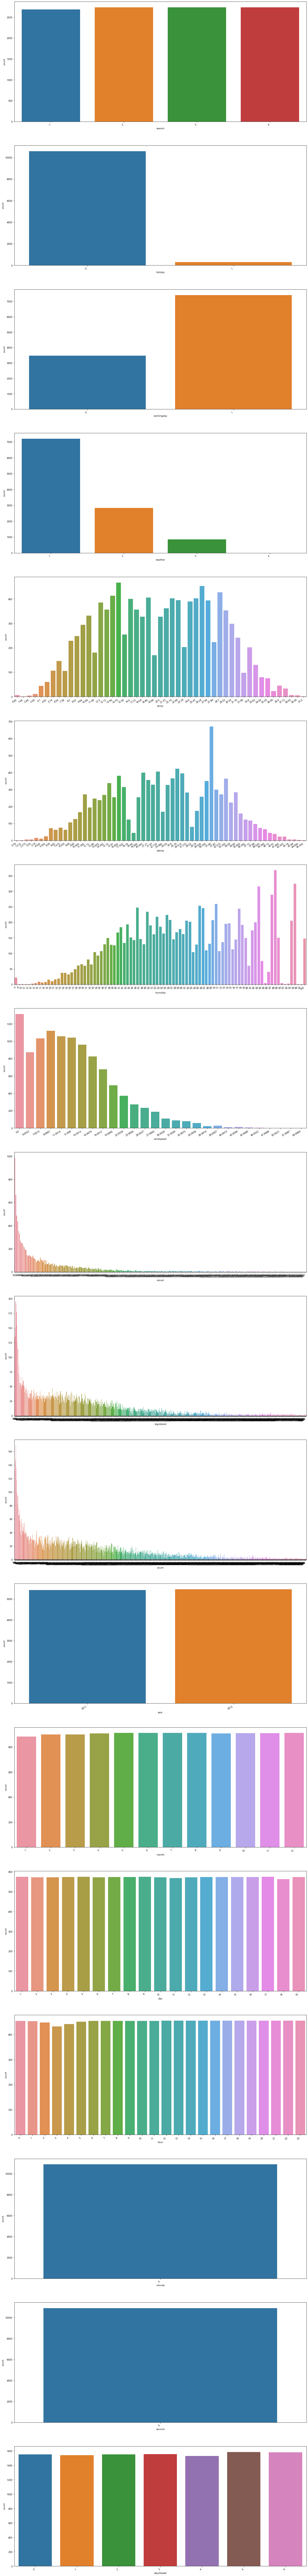

In [6]:
## 훈련용 데이타셋의 숫자형(int, float) 에 대한 컬럼의 그래프 출력

# int, float 형만 그래프로 출력
can_draw_plot_data_columns = train.dtypes[(train.dtypes == "int64") | (train.dtypes == "float64")]

fig, axes = plt.subplots(nrows=len(can_draw_plot_data_columns))
fig.set_size_inches(20, 10 * len(can_draw_plot_data_columns))

i = 0
for col_name in can_draw_plot_data_columns.index:
    plt.sca(axes[i])
    plt.xticks(rotation=30, ha="right")
    sns.countplot(data=train, x=col_name, ax=axes[i])
    i += 1

### 훈련용 데이타셋의 각 컬럼의 정보 확인 결과
### 1. 데이타 count 가 모두 동일함으로 결측치는 없는 것으로 예상
### 2. 풍속(windspeed)이 0인게 의외로 많은 것은 마음에 안듬..
### 3. 상대습도(relative humidity) 값도 정규적이지 않음
### 4. 체감온도(atemp, feels like) 값 중에 튀는 값이 있는 듯

## 일단 값이 없는 풍속이 문제이니, 이 값을 평균으로 대체하잡.

In [7]:
# train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

# # 그래프로 다시 확인
# plt.figure(figsize=(20, 5))
# sns.countplot(data=train, x="windspeed")

# # 기초 통계자료 확인
# train.describe().T

In [8]:
# 풍속이 0인 것과 아닌 것으로 데이타셋 분리
train_windspeed_zero = train.loc[train["windspeed"] == 0]
train_windspeed_non_zero = train.loc[train["windspeed"] != 0]
train["windspeed"].count(), train_windspeed_zero.windspeed.count(), train_windspeed_non_zero.windspeed.count(), 

(10886, 1313, 9573)

In [9]:
train_windspeed_zero.shape, train_windspeed_non_zero.shape

((1313, 19), (9573, 19))

In [10]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    # 풍속이 0인 것과 아닌 것으로 분리
    data_windspeed_zero = data.loc[data["windspeed"] == 0]
    data_windspeed_non_zero = data.loc[data["windspeed"] != 0]
    
    # 풍속을 예측할 feature 선택
    feature_for_prediction = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    
    # 풍속이 0이 아닌 데이타 타입을 string 으로 변경
    data_windspeed_non_zero["windspeed"] = data_windspeed_non_zero["windspeed"].astype("str")
    
    # 랜덤포레스트 분류기 사용
    rfModel_wind = RandomForestClassifier()
    
    # windspeed 학습
    rfModel_wind.fit(data_windspeed_non_zero[feature_for_prediction], data_windspeed_non_zero["windspeed"])
    
    # 학습결과를 바탕으로 풍속이 0인 데이타의 풍속을 예측
    predict_windspeed_zero_values = rfModel_wind.predict(X = data_windspeed_zero[feature_for_prediction])
    
    # 예측 전후 비교를 위해 자료 생성
    predict_windspeed_zero = data_windspeed_zero
    predict_windspeed_non_zero = data_windspeed_non_zero

    # 값이 0으로 기록된 풍속에 예측 값 대입
    predict_windspeed_zero["windspeed"] = predict_windspeed_zero_values
    
    # 0이 아닌 풍속이 있는 데이타프레임에 예측 값 합치기
    data = predict_windspeed_non_zero.append(predict_windspeed_zero)
    
    # 풍속 데이타 타입을 float64로 변경
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop("index", inplace=True, axis=1)
    
    return data

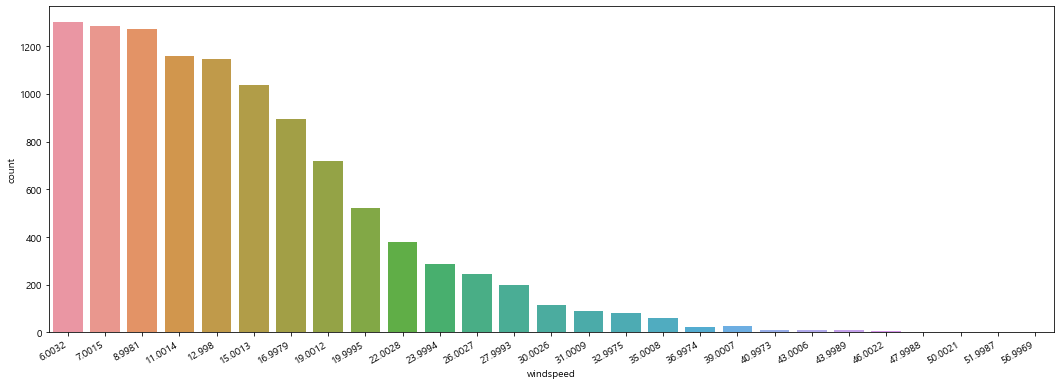

In [11]:
# windspeed 0인 값을 조정한다.
train = predict_windspeed(train)

# 데이타 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation=30, ha="right")
sns.countplot(data=train, x="windspeed", ax=ax1)

In [12]:
# 날짜컬럼(datetime)을 slice해서 년, 월, 일, 시, 분, 초 컬럼을 새로 생성 
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


In [13]:
# 테스트용 자료 기초 통계 확인
test.describe().T

,count,mean,std,min,25%,50%,75%,max
season,6493.0,2.493300,1.091258,1.00,2.0000,3.0000,3.0000,4.0000
holiday,6493.0,0.029108,0.168123,0.00,0.0000,0.0000,0.0000,1.0000
workingday,6493.0,0.685815,0.464226,0.00,0.0000,1.0000,1.0000,1.0000
weather,6493.0,1.436778,0.648390,1.00,1.0000,1.0000,2.0000,4.0000
temp,6493.0,20.620607,8.059583,0.82,13.9400,21.3200,27.0600,40.1800
atemp,6493.0,24.012865,8.782741,0.00,16.6650,25.0000,31.0600,50.0000
humidity,6493.0,64.125212,19.293391,16.00,49.0000,65.0000,81.0000,100.0000
windspeed,6493.0,12.631157,8.250151,0.00,7.0015,11.0014,16.9979,55.9986
year,6493.0,2011.503619,0.500025,2011.00,2011.0000,2012.0000,2012.0000,2012.0000
month,6493.0,6.565070,3.429462,1.00,4.0000,7.0000,10.0000,12.0000


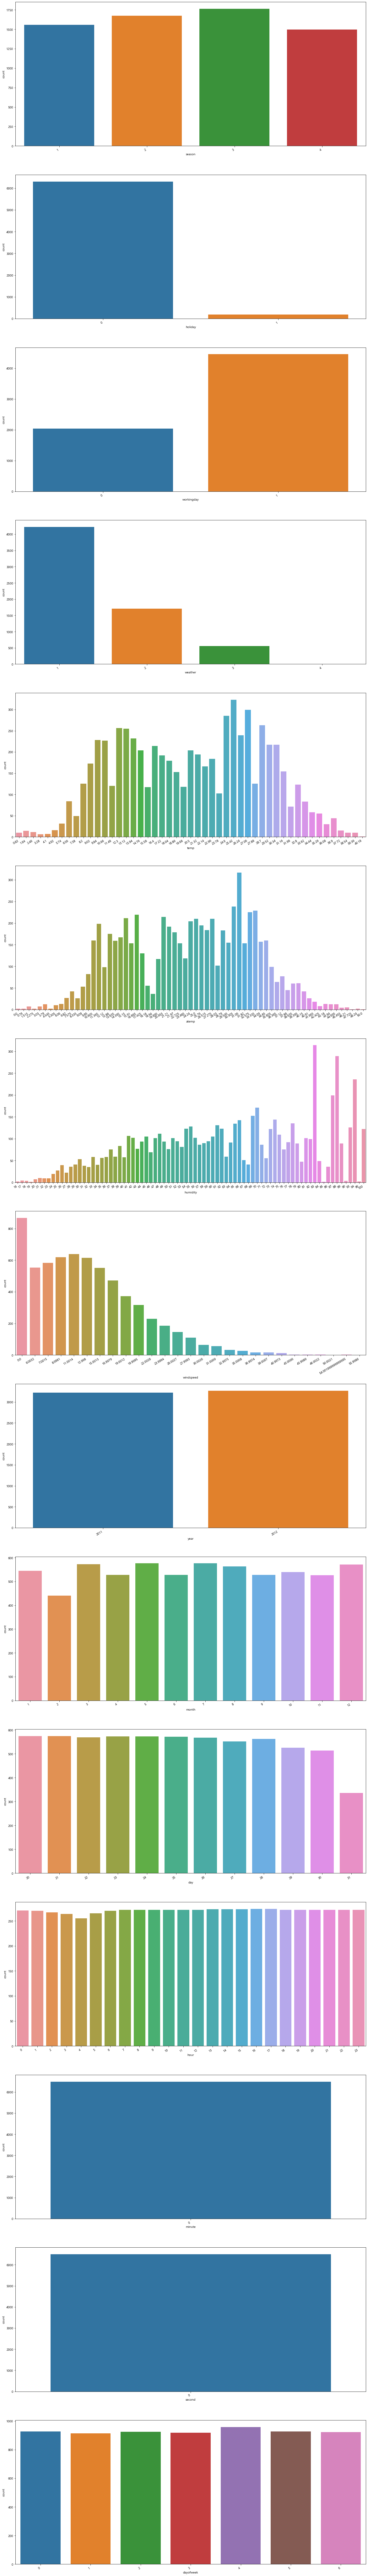

In [14]:
## 테스트용 데이타셋의 숫자형(int, float) 에 대한 컬럼의 그래프 출력

# int, float 형만 그래프로 출력
can_draw_plot_data_columns = test.dtypes[(test.dtypes == "int64") | (test.dtypes == "float64")]

fig, axes = plt.subplots(nrows=len(can_draw_plot_data_columns))
fig.set_size_inches(20, 10 * len(can_draw_plot_data_columns))

i = 0
for col_name in can_draw_plot_data_columns.index:
    plt.sca(axes[i])
    plt.xticks(rotation=30, ha="right")
    sns.countplot(data=test, x=col_name, ax=axes[i])
    i += 1

### 테스트용 데이타셋의 각 컬럼의 정보 확인 결과
### 1. 여기도 풍속(windspeed)이 0인게 의외로 많은 것은 마음에 안듬..
### 3. 상대습도(relative humidity) 값도 정규적이지 않음
### 4. 체감온도(atemp, feels like) 값 중에 튀는 값이 있는 듯

## 일단 값이 없는 풍속이 문제이니, 이 값을 평균으로 대체하잡.

,count,mean,std,min,25%,50%,75%,max
season,6493.0,2.493300,1.091258,1.0000,2.0000,3.000000,3.0000,4.0000
holiday,6493.0,0.029108,0.168123,0.0000,0.0000,0.000000,0.0000,1.0000
workingday,6493.0,0.685815,0.464226,0.0000,0.0000,1.000000,1.0000,1.0000
weather,6493.0,1.436778,0.648390,1.0000,1.0000,1.000000,2.0000,4.0000
temp,6493.0,20.620607,8.059583,0.8200,13.9400,21.320000,27.0600,40.1800
atemp,6493.0,24.012865,8.782741,0.0000,16.6650,25.000000,31.0600,50.0000
humidity,6493.0,64.125212,19.293391,16.0000,49.0000,65.000000,81.0000,100.0000
windspeed,6493.0,14.317776,6.626662,6.0032,8.9981,12.631157,16.9979,55.9986
year,6493.0,2011.503619,0.500025,2011.0000,2011.0000,2012.000000,2012.0000,2012.0000
month,6493.0,6.565070,3.429462,1.0000,4.0000,7.000000,10.0000,12.0000


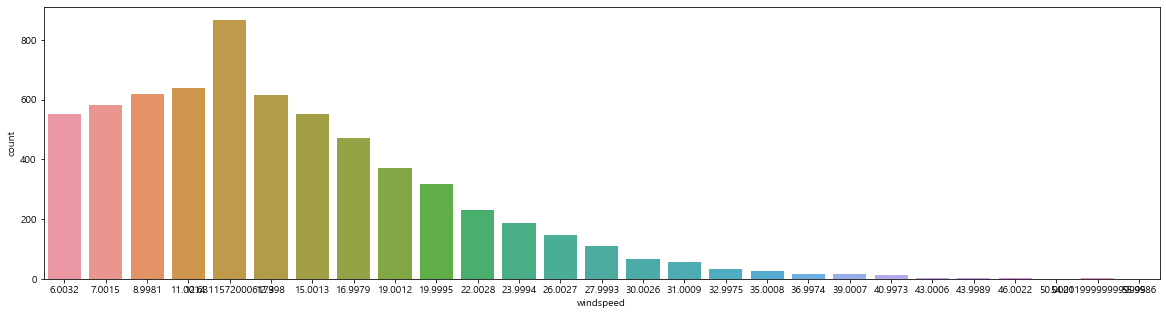

In [15]:
test.loc[test["windspeed"] == 0, "windspeed"] = test["windspeed"].mean()

# 그래프로 다시 확인
plt.figure(figsize=(20, 5))
sns.countplot(data=test, x="windspeed")

# 기초 통계자료 확인
test.describe().T

# Feature Selection

In [16]:
# 일부 컬럼의 데이타 타입을 category 형으로 변경한다.
categorical_feature_names = ["season", "holiday", "workingday", "weather", "dayofweek", "month", "year", "hour"]

for col_name in categorical_feature_names:
    train[col_name] = train[col_name].astype("category")
    test[col_name] = test[col_name].astype("category")

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  category      
 16  minute      10886 non-

(None, None)

In [17]:
feaure_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed", "year", "hour", "dayofweek", "holiday", "workingday"]
feaure_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [18]:
X_train = train[feaure_names]
X_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [19]:
X_test = test[feaure_names]
X_test.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.002700,2011,0,3,0,1
1,1,1,10.66,13.635,56,12.631157,2011,1,3,0,1
2,1,1,10.66,13.635,56,12.631157,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.001400,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.001400,2011,4,3,0,1


In [20]:
label_name = "count"

y_train = train[label_name]
y_train.head()

0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [21]:
y_train.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

# Score 계산

### RMSLE
### 과대평가된 항목보다는 과소평가된 항목에 패널티를 준다.
### 오차를 제곱하여 평균한 값의 제곱근으로 값이 작을수록 정밀도가 높다

In [22]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # change to numpy array
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # each values plus 1 and adjust log
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # minus between values and square
    diff = log_predict - log_actual
    diff = np.square(diff)
    
    # average
    mean_diff = diff.mean()
    
    # root
    score = np.sqrt(mean_diff)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_ford = KFold(n_splits=10, shuffle=True, random_state=0)

# RandomForest

In [24]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
%time score = cross_val_score(model, X_train, y_train, cv=k_ford, scoring=rmsle_score)
score = score.mean()
print("Score = {0:.5f}".format(score))

Wall time: 30.4 s
Score = 0.32910


# Train

In [26]:
# 학습
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Prediction

In [27]:
predictions = model.predict(X_test)

predictions.shape, predictions

((6493,), array([ 12.034,   4.682,   3.578, ..., 103.848, 100.909,  46.878]))

# Visualization

[Text(0.5, 1.0, 'PREDICTION')]

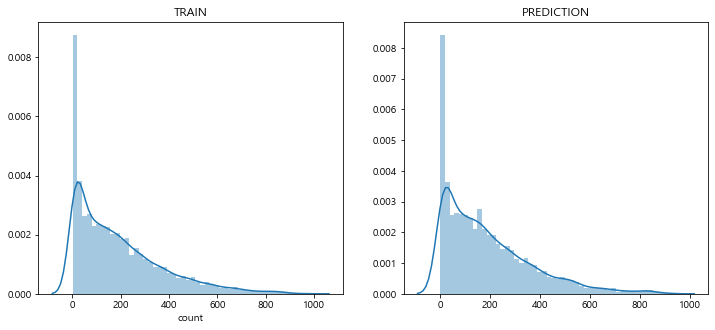

In [28]:
# 예측 데이타 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title="TRAIN")
sns.distplot(predictions, ax=ax2, bins=50)
ax2.set(title="PREDICTION")

# Submission

In [29]:
submission = pd.read_csv("./일단공부/kaggle_data/kaggle_bike_sharing_demand/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.034
1,2011-01-20 01:00:00,4.682
2,2011-01-20 02:00:00,3.578
3,2011-01-20 03:00:00,3.552
4,2011-01-20 04:00:00,3.004


In [30]:
submission.to_csv("./일단공부/kaggle_data/kaggle_bike_sharing_demand/Score_{0:.5f}_submission.csv".format(score), index=False)